# Projeto 1 

## Parte 1

1.  

Se inicializarmos o treinamento de um modelo MLP via método dos gradientes com os mesmos pesos e vícios, cada camada latente (hidden layer) irá receber exatamente o mesmo sinal, isto é, se todos os pesos são inicializados no 1, cada unidade reberá um sinal igual a soma dos inputs e terá como output o sigmoid da soma dos inputs. Se todos os pesos forem zero, ocorrerá um problema ainda pior, cada camada latente receberá sinal zero. Qualquer que seja o input, se todos os pesos são os mesmo, todas as unidades da camada latente serão os mesmo também. Por isso optamos por uma inicialização aleatória ou, pelo menos, com valores diferentes.


2.  

A escolha de uma função de ativação linear no lugar de uma não-linear implica no output ser apenas uma transformação linear do input, o que impossibilita a formação de uma função de aproximação universal. Nesse caso, não importa quantas camadas a rede possua, ela sempre se comportará como um perceptron de uma única camada, uma vez que somar essas camadas resultaria outra função linear. O mesmo ocorre para o caso onde todos os neurônios tem funções de ativação afim ($f(x) = ax + c$, onde $a,c$ são constantes), que resultará apenas em uma transformação afim do input no output.

Uma rede neural pode conter neurônios com função de ativação linear, como na camada do output, mas devem vir acompanhados de neurônios com ativação não-linear em outras partes da rede.

3.  

Sobreajuste se refere a um modelo que modela os dados de treino bem demais. Ocorre quando um modelo aprende os detalhes e o ruído dos dados de treino de uma forma que impacta negativamente na performance do modelo para novos dados. Isso significa que o ruído e a aleatoriedade no conjunto de treino é aprendido como algo fundamental para o modelo, o que não se aplica aos dados de treino e impantam negativamente a capacidade do modelo em generalizar.



4.  

With a single hidden unit and sigmoidal activation functions, a neural network for classification is, for all intents and purposes, just logistic regression. However, as the number of hidden units increases, so does the complexity of the model.

Uma rede neural para classificação com apenas uma camada e função de ativação sigmoidal é o mesmo que um modelo de regressão logística. Os MLPs (multilayer perceptron) com ativações sigmoidais são redes mais complexa, com um número maior de camadas, o que pode levar ao sobreajuster com uma chance maior. Isso ocorre

O modelo MLP profundo com ativações sigmoid terá uma chance maior de sobreajustar os dados do que um modelo de regressão logística para um problema de classificação binária.





## Parte 2

In [30]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np 

In [31]:
#Converta as amostras de números inteiros em números de ponto flutuante:
training_data_np = np.genfromtxt("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 1/mnist_train.csv", delimiter=",", encoding="utf8")
test_data_np = np.genfromtxt("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 1/mnist_test.csv", delimiter=",", encoding="utf8")

print( training_data_np.shape )
#print( training_data_np )

print( test_data_np.shape )
#print( test_data_np )


(60000, 785)
(10000, 785)


### a) Treino, validação e teste

In [178]:
test_data_np.shape

(10000, 785)

In [174]:
training_data2 = tf.constant(training_data_np[0:60000, :])

TensorShape([10000, 785])

In [33]:
# Separate data into training, validation and testing
training_data = tf.constant(training_data_np[0:50000, :]) #primeiras 50k para o conjunto de treino
validation_data = tf.constant(training_data_np[50000:60000, :]) #ultimas 10k para o conjunto de validação
test_data = tf.constant(test_data_np) #conjunto de teste

print( validation_data.shape )
print( validation_data )

p = 28**2
#print(p)

# Extracting X and y from training dataset
X_train = training_data[:, 1:(p+1)]
y_train = training_data[:, 0]
#print( X_train.shape )

# Extracting X and y from validation dataset
X_valid = validation_data[:, 1:(p+1)]
y_valid = validation_data[:, 0]
#print( X_valid.shape )


# Extracting X and y from test dataset
X_test = test_data[:, 1:(p+1)]
y_test = test_data[:, 0]
#print( X_test.shape )


(10000, 785)
tf.Tensor(
[[3. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [6. 0. 0. ... 0. 0. 0.]
 [8. 0. 0. ... 0. 0. 0.]], shape=(10000, 785), dtype=float64)


In [34]:
# Reescalonando os pixels para para o intervalor [0,1]
x_train, x_valid, x_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

print( "x_train.shape")
print( x_train.shape )

print( "x_valid.shape")
print( x_valid.shape )

print( "x_test.shape")
print( x_test.shape )

print( "y_train.shape")
print( y_train.shape )

print( "y_valid.shape")
print( y_valid.shape )

print( "y_test.shape")
print( y_test.shape )

x_train.shape
(50000, 784)
x_valid.shape
(10000, 784)
x_test.shape
(10000, 784)
y_train.shape
(50000,)
y_valid.shape
(10000,)
y_test.shape
(10000,)


### b) Modelo de regressão multinomial logística

In [99]:
#Criando o modelo de regressão multinomial logística
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model1.compile(loss='sparse_categorical_crossentropy', 
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
               metrics=['accuracy'])
hist = model1.fit(x_train, y_train, epochs=50,batch_size= 1000,validation_data=(x_valid, y_valid))

model1.evaluate(x_test,  y_test, verbose=2)
model1.save('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist.h5')

model1.summary()

Epoch 1/50
50/50 [==============================] - 1s 9ms/step - loss: 1.6557 - accuracy: 0.5239 - val_loss: 1.0456 - val_accuracy: 0.7941
Epoch 2/50
50/50 [==============================] - 0s 7ms/step - loss: 0.8773 - accuracy: 0.8078 - val_loss: 0.6793 - val_accuracy: 0.8575
Epoch 3/50
50/50 [==============================] - 0s 7ms/step - loss: 0.6520 - accuracy: 0.8500 - val_loss: 0.5437 - val_accuracy: 0.8775
Epoch 4/50
50/50 [==============================] - 0s 7ms/step - loss: 0.5505 - accuracy: 0.8672 - val_loss: 0.4730 - val_accuracy: 0.8870
Epoch 5/50
50/50 [==============================] - 0s 7ms/step - loss: 0.4911 - accuracy: 0.8784 - val_loss: 0.4304 - val_accuracy: 0.8926
Epoch 6/50
50/50 [==============================] - 0s 7ms/step - loss: 0.4519 - accuracy: 0.8852 - val_loss: 0.3998 - val_accuracy: 0.8998
Epoch 7/50
50/50 [==============================] - 0s 10ms/step - loss: 0.4238 - accuracy: 0.8914 - val_loss: 0.3783 - val_accuracy: 0.9040
Epoch 8/50
50/50 [=

### c) 4 MLPs

In [90]:
# 1 camada
model_um = tf.keras.models.Sequential()

model_um.add(tf.keras.layers.Flatten())
model_um.add(tf.keras.layers.Dense(120, activation='relu') )
model_um.add(tf.keras.layers.Dropout(0.5))
model_um.add(tf.keras.layers.Dense(10, activation='softmax') )

model_um.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist_um = model_um.fit(x_train, y_train, epochs=50, batch_size= 1000, validation_data=(x_valid, y_valid))
model_um.save('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist_um.h5')
model_um.evaluate(x_test,  y_test, verbose=2)

model_um.summary()

Epoch 1/50
50/50 [==============================] - 1s 16ms/step - loss: 1.0939 - accuracy: 0.6641 - val_loss: 0.4089 - val_accuracy: 0.8969
Epoch 2/50
50/50 [==============================] - 1s 13ms/step - loss: 0.4849 - accuracy: 0.8595 - val_loss: 0.2903 - val_accuracy: 0.9202
Epoch 3/50
50/50 [==============================] - 1s 13ms/step - loss: 0.3859 - accuracy: 0.8884 - val_loss: 0.2451 - val_accuracy: 0.9320
Epoch 4/50
50/50 [==============================] - 1s 13ms/step - loss: 0.3362 - accuracy: 0.9030 - val_loss: 0.2164 - val_accuracy: 0.9412
Epoch 5/50
50/50 [==============================] - 1s 12ms/step - loss: 0.3039 - accuracy: 0.9112 - val_loss: 0.1980 - val_accuracy: 0.9452
Epoch 6/50
50/50 [==============================] - 1s 12ms/step - loss: 0.2825 - accuracy: 0.9182 - val_loss: 0.1852 - val_accuracy: 0.9482
Epoch 7/50
50/50 [==============================] - 1s 15ms/step - loss: 0.2614 - accuracy: 0.9244 - val_loss: 0.1723 - val_accuracy: 0.9512
Epoch 8/50
50

In [92]:
# 2 camadas
model_dois = tf.keras.models.Sequential()

model_dois.add(tf.keras.layers.Flatten())
model_dois.add(tf.keras.layers.Dense(120, activation='relu') )
model_dois.add(tf.keras.layers.Dropout(0.5))
model_dois.add(tf.keras.layers.Dense(84, activation='relu') )
model_dois.add(tf.keras.layers.Dropout(0.5))
model_dois.add(tf.keras.layers.Dense(10, activation='softmax') )

model_dois.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist_dois = model_dois.fit(x_train, y_train, epochs=50, batch_size= 1000, validation_data=(x_valid, y_valid))
model_dois.save('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist_dois.h5')

model_dois.evaluate(x_test,  y_test, verbose=2)

model_dois.summary()

Epoch 1/50
50/50 [==============================] - 1s 16ms/step - loss: 1.5147 - accuracy: 0.4899 - val_loss: 0.5086 - val_accuracy: 0.8811
Epoch 2/50
50/50 [==============================] - 1s 14ms/step - loss: 0.6909 - accuracy: 0.7879 - val_loss: 0.2931 - val_accuracy: 0.9178
Epoch 3/50
50/50 [==============================] - 1s 14ms/step - loss: 0.5013 - accuracy: 0.8520 - val_loss: 0.2429 - val_accuracy: 0.9311
Epoch 4/50
50/50 [==============================] - 1s 14ms/step - loss: 0.4203 - accuracy: 0.8789 - val_loss: 0.2126 - val_accuracy: 0.9398
Epoch 5/50
50/50 [==============================] - 1s 14ms/step - loss: 0.3781 - accuracy: 0.8925 - val_loss: 0.1951 - val_accuracy: 0.9450
Epoch 6/50
50/50 [==============================] - 1s 14ms/step - loss: 0.3392 - accuracy: 0.9042 - val_loss: 0.1757 - val_accuracy: 0.9510
Epoch 7/50
50/50 [==============================] - 1s 14ms/step - loss: 0.3119 - accuracy: 0.9122 - val_loss: 0.1643 - val_accuracy: 0.9535
Epoch 8/50
50

In [94]:
# 3 camadas
model_tres = tf.keras.models.Sequential()

model_tres.add(tf.keras.layers.Flatten())
model_tres.add(tf.keras.layers.Dense(200, activation='relu') )
model_tres.add(tf.keras.layers.Dropout(0.5))
model_tres.add(tf.keras.layers.Dense(120, activation='relu') )
model_tres.add(tf.keras.layers.Dropout(0.5))
model_tres.add(tf.keras.layers.Dense(84, activation='relu') )
model_tres.add(tf.keras.layers.Dropout(0.5))
model_tres.add(tf.keras.layers.Dense(10, activation='softmax') )

model_tres.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist_tres = model_tres.fit(x_train, y_train, epochs=50, batch_size= 1000, validation_data=(x_valid, y_valid))
model_tres.save('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist_tres.h5')

model_tres.evaluate(x_test,  y_test, verbose=2)

model_tres.summary()

Epoch 1/50
50/50 [==============================] - 2s 26ms/step - loss: 1.6607 - accuracy: 0.4223 - val_loss: 0.5413 - val_accuracy: 0.8657
Epoch 2/50
50/50 [==============================] - 1s 21ms/step - loss: 0.7120 - accuracy: 0.7760 - val_loss: 0.2676 - val_accuracy: 0.9225
Epoch 3/50
50/50 [==============================] - 1s 20ms/step - loss: 0.4808 - accuracy: 0.8633 - val_loss: 0.2049 - val_accuracy: 0.9429
Epoch 4/50
50/50 [==============================] - 1s 21ms/step - loss: 0.3846 - accuracy: 0.8957 - val_loss: 0.1769 - val_accuracy: 0.9526
Epoch 5/50
50/50 [==============================] - 1s 23ms/step - loss: 0.3346 - accuracy: 0.9101 - val_loss: 0.1523 - val_accuracy: 0.9600
Epoch 6/50
50/50 [==============================] - 1s 20ms/step - loss: 0.2953 - accuracy: 0.9223 - val_loss: 0.1403 - val_accuracy: 0.9631
Epoch 7/50
50/50 [==============================] - 1s 20ms/step - loss: 0.2666 - accuracy: 0.9302 - val_loss: 0.1295 - val_accuracy: 0.9672
Epoch 8/50
50

In [95]:
# 4 camadas
model_quatro = tf.keras.models.Sequential()

model_quatro.add(tf.keras.layers.Flatten())
model_quatro.add(tf.keras.layers.Dense(200, activation='relu') )
model_quatro.add(tf.keras.layers.Dropout(0.5))
model_quatro.add(tf.keras.layers.Dense(150, activation='relu') )
model_quatro.add(tf.keras.layers.Dropout(0.5))
model_quatro.add(tf.keras.layers.Dense(120, activation='relu') )
model_quatro.add(tf.keras.layers.Dropout(0.5))
model_quatro.add(tf.keras.layers.Dense(84, activation='relu') )
model_quatro.add(tf.keras.layers.Dropout(0.5))
model_quatro.add(tf.keras.layers.Dense(10, activation='softmax') )

model_quatro.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist_quatro = model_quatro.fit(x_train, y_train, epochs=50, batch_size= 1000, validation_data=(x_valid, y_valid))
model_quatro.save('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist_quatro.h5')

model_quatro.evaluate(x_test,  y_test, verbose=2)

model_quatro.summary()

Epoch 1/50
50/50 [==============================] - 2s 25ms/step - loss: 1.9227 - accuracy: 0.3069 - val_loss: 0.8409 - val_accuracy: 0.7968
Epoch 2/50
50/50 [==============================] - 1s 23ms/step - loss: 0.9252 - accuracy: 0.6899 - val_loss: 0.3619 - val_accuracy: 0.9044
Epoch 3/50
50/50 [==============================] - 1s 23ms/step - loss: 0.5795 - accuracy: 0.8281 - val_loss: 0.2430 - val_accuracy: 0.9359
Epoch 4/50
50/50 [==============================] - 1s 23ms/step - loss: 0.4459 - accuracy: 0.8796 - val_loss: 0.1973 - val_accuracy: 0.9472
Epoch 5/50
50/50 [==============================] - 1s 23ms/step - loss: 0.3735 - accuracy: 0.9021 - val_loss: 0.1756 - val_accuracy: 0.9531
Epoch 6/50
50/50 [==============================] - 1s 23ms/step - loss: 0.3302 - accuracy: 0.9152 - val_loss: 0.1587 - val_accuracy: 0.9591
Epoch 7/50
50/50 [==============================] - 1s 23ms/step - loss: 0.2955 - accuracy: 0.9259 - val_loss: 0.1459 - val_accuracy: 0.9627
Epoch 8/50
50

### d) Gráficos dos percentuais de acurácia

In [38]:
import matplotlib.pyplot as plt

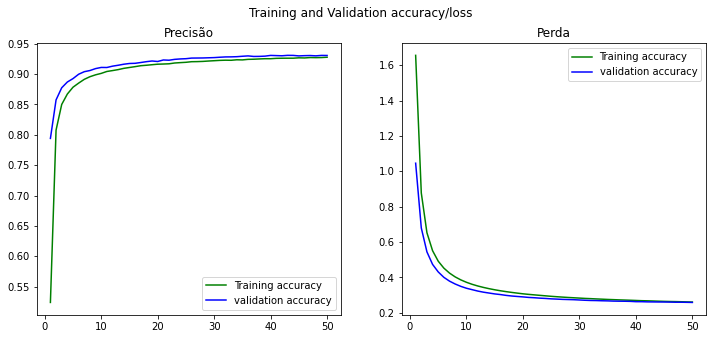

In [102]:
acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

fig, ax = plt.subplots(1, 2,figsize=(12, 5))
fig.suptitle('Training and Validation accuracy/loss')

epochs = range(1,51)

ax[0].plot(epochs, acc_train, 'g', label='Training accuracy')
ax[0].plot(epochs, acc_val, 'b', label='validation accuracy')
ax[0].set_title('Precisão')
ax[0].legend(loc='best')

ax[1].plot(epochs, loss_train, 'g', label='Training accuracy')
ax[1].plot(epochs, loss_val, 'b', label='validation accuracy')
ax[1].set_title('Perda')
ax[1].legend(loc='best')

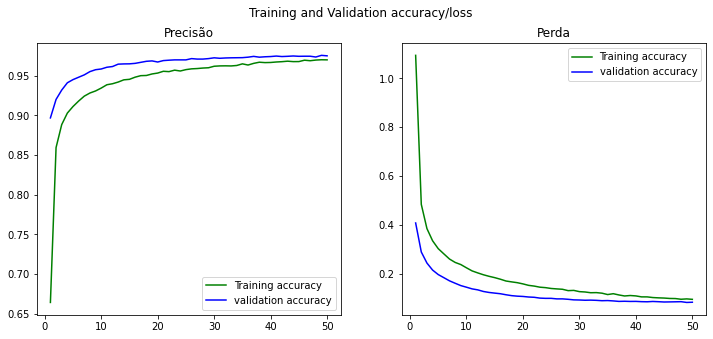

In [91]:
acc_train_um = hist_um.history['accuracy']
acc_val_um = hist_um.history['val_accuracy']

loss_train_um = hist_um.history['loss']
loss_val_um = hist_um.history['val_loss']

epochs = range(1,51)

fig, ax = plt.subplots(1, 2,figsize=(12, 5))
fig.suptitle('Training and Validation accuracy/loss')

ax[0].plot(epochs, acc_train_um, 'g', label='Training accuracy')
ax[0].plot(epochs, acc_val_um, 'b', label='validation accuracy')
ax[0].set_title('Precisão')
ax[0].legend(loc='best')

ax[1].plot(epochs, loss_train_um, 'g', label='Training accuracy')
ax[1].plot(epochs, loss_val_um, 'b', label='validation accuracy')
ax[1].set_title('Perda')
ax[1].legend(loc='best')

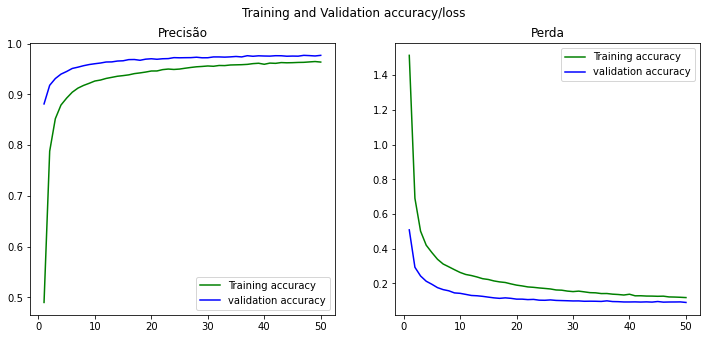

In [93]:
acc_train_dois = hist_dois.history['accuracy']
acc_val_dois = hist_dois.history['val_accuracy']

loss_train_dois = hist_dois.history['loss']
loss_val_dois = hist_dois.history['val_loss']

epochs = range(1,51)

fig, ax = plt.subplots(1, 2,figsize=(12, 5))
fig.suptitle('Training and Validation accuracy/loss')

ax[0].plot(epochs, acc_train_dois, 'g', label='Training accuracy')
ax[0].plot(epochs, acc_val_dois, 'b', label='validation accuracy')
ax[0].set_title('Precisão')
ax[0].legend(loc='best')

ax[1].plot(epochs, loss_train_dois, 'g', label='Training accuracy')
ax[1].plot(epochs, loss_val_dois, 'b', label='validation accuracy')
ax[1].set_title('Perda')
ax[1].legend(loc='best')

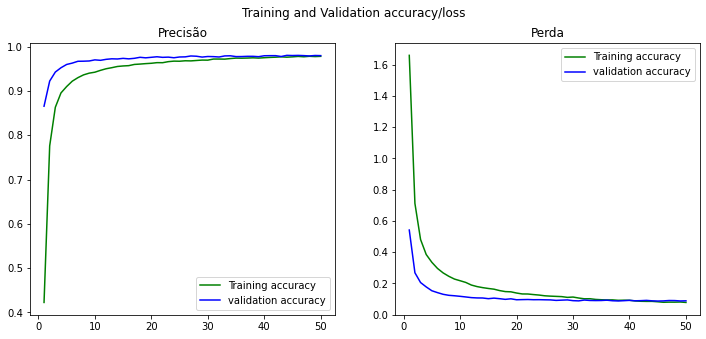

In [96]:
acc_train_tres = hist_tres.history['accuracy']
acc_val_tres = hist_tres.history['val_accuracy']

loss_train_tres = hist_tres.history['loss']
loss_val_tres = hist_tres.history['val_loss']

epochs = range(1,51)

fig, ax = plt.subplots(1, 2,figsize=(12, 5))
fig.suptitle('Training and Validation accuracy/loss')

ax[0].plot(epochs, acc_train_tres, 'g', label='Training accuracy')
ax[0].plot(epochs, acc_val_tres, 'b', label='validation accuracy')
ax[0].set_title('Precisão')
ax[0].legend(loc='best')

ax[1].plot(epochs, loss_train_tres, 'g', label='Training accuracy')
ax[1].plot(epochs, loss_val_tres, 'b', label='validation accuracy')
ax[1].set_title('Perda')
ax[1].legend(loc='best')

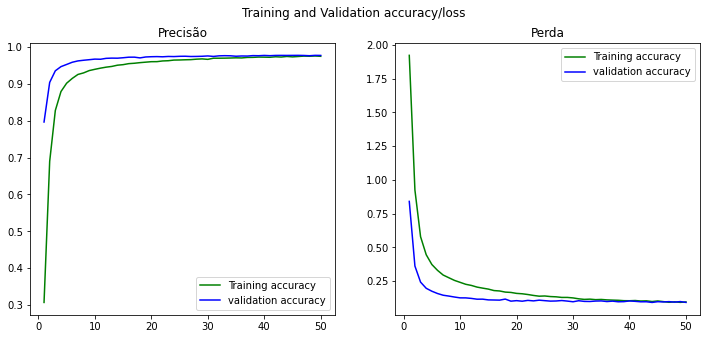

In [97]:
acc_train_quatro = hist_quatro.history['accuracy']
acc_val_quatro = hist_quatro.history['val_accuracy']

loss_train_quatro = hist_quatro.history['loss']
loss_val_quatro = hist_quatro.history['val_loss']

epochs = range(1,51)

fig, ax = plt.subplots(1, 2,figsize=(12, 5))
fig.suptitle('Training and Validation accuracy/loss')

ax[0].plot(epochs, acc_train_quatro, 'g', label='Training accuracy')
ax[0].plot(epochs, acc_val_quatro, 'b', label='validation accuracy')
ax[0].set_title('Precisão')
ax[0].legend(loc='best')

ax[1].plot(epochs, loss_train_quatro, 'g', label='Training accuracy')
ax[1].plot(epochs, loss_val_quatro, 'b', label='validation accuracy')
ax[1].set_title('Perda')
ax[1].legend(loc='best')

### e) Tabela de acurácia

In [169]:
print("Reg. Multinom. Logística: ","precisão de treino: ", hist.history['accuracy'][-1],",",
     "precisão de validação: ",hist.history['val_accuracy'][-1])
print("MLP com 1 camada latente: ", "precisão de treino: ",hist_um.history['accuracy'][-1], ",",
      "precisão de validação: ", hist_um.history['val_accuracy'][-1])
print("MLP com 2 camada latente: ","precisão de treino: ",hist_dois.history['accuracy'][-1],",",
     "precisão de validação: ",hist_dois.history['val_accuracy'][-1])
print("MLP com 3 camada latente: ","precisão de treino: ",hist_tres.history['accuracy'][-1],",",
     "precisão de validação: ",hist_tres.history['val_accuracy'][-1])
print("MLP com 4 camada latente: ","precisão de treino: ", hist_quatro.history['accuracy'][-1],",",
     "precisão de validação: ",hist_quatro.history['val_accuracy'][-1])

Reg. Multinom. Logística:  precisão de treino:  0.9277999997138977 , precisão de validação:  0.9307000041007996
MLP com 1 camada latente:  precisão de treino:  0.9701200127601624 , precisão de validação:  0.9751999974250793
MLP com 2 camada latente:  precisão de treino:  0.9635599851608276 , precisão de validação:  0.9768000245094299
MLP com 3 camada latente:  precisão de treino:  0.9857400059700012 , precisão de validação:  0.98089998960495
MLP com 4 camada latente:  precisão de treino:  0.9752200245857239 , precisão de validação:  0.9775999784469604


### f) Ensemble com os 4 MLPs

In [127]:
keras_model = tf.keras.models.load_model('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist.h5', compile=False)
keras_model._name = 'model'
keras_model1 = tf.keras.models.load_model('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist_um.h5', compile=False)
keras_model1._name = 'model1'
keras_model2 = tf.keras.models.load_model('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist_dois.h5', compile=False)
keras_model2._name = 'model2'
keras_model3 = tf.keras.models.load_model('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist_tres.h5', compile=False)
keras_model3._name = 'model3'
keras_model4 = tf.keras.models.load_model('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist_quatro.h5', compile=False)
keras_model4._name = 'model4'

In [130]:
#Soma os resultados da predição de cada modelo MLP para os dados de entrada de validação
ensemble=keras_model1.predict(x_valid)
ensemble+=keras_model2.predict(x_valid)
ensemble+=keras_model3.predict(x_valid)
ensemble+=keras_model4.predict(x_valid)

#Encontra o índice para o qual a soma das 4 probabilidades será máxima 

y_ensemble=np.argmax(ensemble,axis=1)

#Converte Y_validacao para o formato numpy

y_valid_np=y_valid.numpy().astype(np.int64)
y_valid_np

#Verifica as correspondências entre o Y de validação e o do ensemble, soma a quantidade de correspondências
# e divide pelo tamanho total
print("Acurácia do ensemble é {}".format(np.sum(y_valid_np==y_ensemble)/10000))

Acurácia do ensemble é 0.9802


In [170]:
#Soma os resultados da predição de cada modelo MLP para os dados de entrada de validação
ensemble2=keras_model1.predict(x_test)
ensemble2+=keras_model2.predict(x_test)
ensemble2+=keras_model3.predict(x_test)
ensemble2+=keras_model4.predict(x_test)

#Encontra o índice para o qual a soma das 4 probabilidades será máxima 

y_ensemble2=np.argmax(ensemble2,axis=1)

#Converte Y_validacao para o formato numpy

y_valid2_np=y_test.numpy().astype(np.int64)
y_valid2_np

#Verifica as correspondências entre o Y de validação e o do ensemble, soma a quantidade de correspondências
# e divide pelo tamanho total
print("Acurácia do ensemble é {}".format(np.sum(y_valid2_np==y_ensemble2)/10000))

Acurácia do ensemble é 0.9799


In [121]:
models = [keras_model1, keras_model2, keras_model3, keras_model4]
model_input = tf.keras.Input(shape=784)
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [125]:
ensemble_model

In [122]:
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist_ens = ensemble_model.fit(x_train, y_train, epochs=50, batch_size= 1000, validation_data=(x_valid, y_valid))
ensemble_model.save('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist_ens.h5')
ensemble_model.evaluate(x_test,  y_test, verbose=2)

ensemble_model.summary()

Epoch 1/50
50/50 [==============================] - 4s 55ms/step - loss: 0.0573 - accuracy: 0.9886 - val_loss: 0.0780 - val_accuracy: 0.9799
Epoch 2/50
50/50 [==============================] - 3s 54ms/step - loss: 0.0556 - accuracy: 0.9889 - val_loss: 0.0774 - val_accuracy: 0.9799
Epoch 3/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0567 - accuracy: 0.9891 - val_loss: 0.0780 - val_accuracy: 0.9807
Epoch 4/50
50/50 [==============================] - 3s 51ms/step - loss: 0.0551 - accuracy: 0.9886 - val_loss: 0.0789 - val_accuracy: 0.9791
Epoch 5/50
50/50 [==============================] - 3s 51ms/step - loss: 0.0563 - accuracy: 0.9887 - val_loss: 0.0761 - val_accuracy: 0.9804
Epoch 6/50
50/50 [==============================] - 3s 51ms/step - loss: 0.0542 - accuracy: 0.9894 - val_loss: 0.0766 - val_accuracy: 0.9810
Epoch 7/50
50/50 [==============================] - 3s 51ms/step - loss: 0.0537 - accuracy: 0.9887 - val_loss: 0.0768 - val_accuracy: 0.9808
Epoch 8/50
50

C:\Users\malta\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


313/313 - 1s - loss: 0.0026 - accuracy: 0.0313 - 839ms/epoch - 3ms/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 model1 (Sequential)            (1000, 10)           95410       ['input_4[0][0]']                
                                                                                                  
 model2 (Sequential)            (1000, 10)           105214      ['input_4[0][0]']                
                                                                                                  
 model3 (Sequential)            (1000, 10)           192134      ['input_4[0][0]']                
                    

In [123]:
print(hist.history['accuracy'][-1])
print(hist_ens.history['accuracy'][-1])

0.9277999997138977
0.9916599988937378


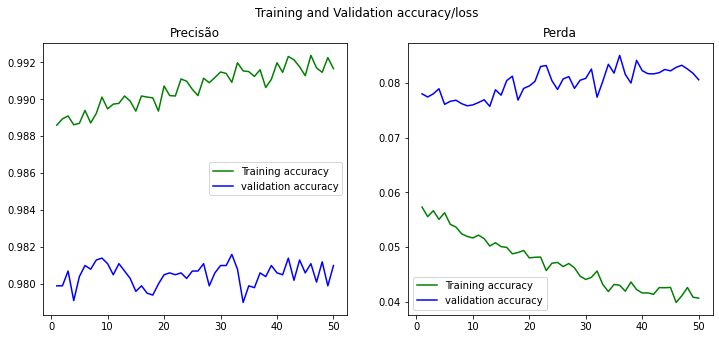

In [124]:
acc_train_ens = hist_ens.history['accuracy']
acc_val_ens = hist_ens.history['val_accuracy']

loss_train_ens = hist_ens.history['loss']
loss_val_ens = hist_ens.history['val_loss']

epochs = range(1,51)

fig, ax = plt.subplots(1, 2,figsize=(12, 5))
fig.suptitle('Training and Validation accuracy/loss')

ax[0].plot(epochs, acc_train_ens, 'g', label='Training accuracy')
ax[0].plot(epochs, acc_val_ens, 'b', label='validation accuracy')
ax[0].set_title('Precisão')
ax[0].legend(loc='best')

ax[1].plot(epochs, loss_train_ens, 'g', label='Training accuracy')
ax[1].plot(epochs, loss_val_ens, 'b', label='validation accuracy')
ax[1].set_title('Perda')
ax[1].legend(loc='best')

### g) Comparando

In [155]:
x_train_f = tf.constant(training_data_np[0:60000, :])

In [156]:
x_train_f = x_train_f / 255.0

In [160]:
# 3 camadas
model_f = tf.keras.models.Sequential()

model_f.add(tf.keras.layers.Flatten())
model_f.add(tf.keras.layers.Dense(200, activation='relu') )
model_f.add(tf.keras.layers.Dropout(0.5))
model_f.add(tf.keras.layers.Dense(120, activation='relu') )
model_f.add(tf.keras.layers.Dropout(0.5))
model_f.add(tf.keras.layers.Dense(84, activation='relu') )
model_f.add(tf.keras.layers.Dropout(0.5))
model_f.add(tf.keras.layers.Dense(10, activation='softmax') )

model_f.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist_f = model_f.fit(x_train, y_train, epochs=50, batch_size= 1000,validation_data=(x_valid, y_valid))
model_f.save('C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 1\\modelos treinados\\hist_f.h5')


Epoch 1/50
50/50 [==============================] - 2s 23ms/step - loss: 1.6254 - accuracy: 0.4283 - val_loss: 0.5772 - val_accuracy: 0.8630
Epoch 2/50
50/50 [==============================] - 1s 20ms/step - loss: 0.7202 - accuracy: 0.7713 - val_loss: 0.2802 - val_accuracy: 0.9205
Epoch 3/50
50/50 [==============================] - 1s 20ms/step - loss: 0.4829 - accuracy: 0.8619 - val_loss: 0.2186 - val_accuracy: 0.9376
Epoch 4/50
50/50 [==============================] - 1s 20ms/step - loss: 0.3911 - accuracy: 0.8918 - val_loss: 0.1908 - val_accuracy: 0.9475
Epoch 5/50
50/50 [==============================] - 1s 20ms/step - loss: 0.3388 - accuracy: 0.9074 - val_loss: 0.1650 - val_accuracy: 0.9550
Epoch 6/50
50/50 [==============================] - 1s 21ms/step - loss: 0.3009 - accuracy: 0.9181 - val_loss: 0.1463 - val_accuracy: 0.9598
Epoch 7/50
50/50 [==============================] - 1s 21ms/step - loss: 0.2724 - accuracy: 0.9272 - val_loss: 0.1368 - val_accuracy: 0.9628
Epoch 8/50
50

In [180]:
model_f.evaluate(x_test,  y_test, verbose=2)
#model_f.summary()

313/313 - 1s - loss: 0.0906 - accuracy: 0.9783 - 574ms/epoch - 2ms/step


[0.09058233350515366, 0.9782999753952026]

In [181]:
model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.2680 - accuracy: 0.9250 - 451ms/epoch - 1ms/step


[0.26797187328338623, 0.925000011920929]

## Referências

https://stats.stackexchange.com/questions/469799/why-is-logistic-regression-particularly-prone-to-overfitting-in-high-dimensions

https://www.quora.com/What-is-the-difference-between-neural-network-and-logistic-regression

https://www.tmwr.org/tuning.html